In [1]:
!pip install pyCalor

  Using cached pycalor-1.0.21-py3-none-any.whl.metadata (4.8 kB)
  Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached pycalor-1.0.21-py3-none-any.whl (24 kB)
Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.8 MB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyCalor]m2/4 [igraph]p]


In [2]:
from pyCalor import thermo as th

In [3]:
import matplotlib.pyplot as plt

Instead of using the "tables" in the back of your textbook to determine thermodynamic properties, here we will use a Python module called [`pyCalor`](https://pypi.org/project/pyCalor/).

This Python module was developed in the Department of Mechanical Engineering at the University of California, Berkeley. It is used for teaching undergraduate thermodynamics (ME40).

The software package contains classes `state` and `process`. The following is the description of their use. You can also get the built-in information by typing the following statements in the Python command line:  

`from pyCalor import thermo as th`

`print(th.state.__doc__)`   

`print(th.process.__doc__)`  

In [4]:
print(th.state.__doc__)

stateObject = state(fluidName, property1=value1, property2, value2, name="A")
    
    fluidName = 'water, 'r134a', 'air', ''nitrogen', etc.
    property1 and property2 are two independent intensive properties
    value1 and value2 are property values (in base units; see >>> th.state.units)
    
    Examples:
        >>> import thermo as th
        >>> th.state.units
        >>> st1 = th.state('water', p=(1,'bar'), v=0.1, name="1")
        >>> st1.plot("Pv")
        >>> st2 = th.state('R134a', x=1, t=300, name="B")
        >>> fig1 = st2.plot("Ts",isoProp="v")
        >>> fig1.savefig("figure_1.jpg")
        >>> st3 = th.state('air', p=(1,'Mpa'), t=(10,'c'))
        >>> st3.name = "2a"
    


In [5]:
print(th.process.__doc__)

pr = process([(state1,state2),(state2,state3),...])
    
    Examples:
        >>> import thermo as th
        >>> st1 = th.state('water', p=( 1,'bar'), x=0, name="A")
        >>> st2 = th.state('water', p=(20,'bar'), s=st1.s, name="B")
        >>> pr = th.process([st1,st2])
        >>> fig2 = pr.plot("pv")
        >>> st3 = th.state('water', p=(20,'bar'), x=1,name="C")
        >>> st4 = th.state('water', p=( 1,'bar'), s=st3.s, name="D")
        >>> pr2 = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st1)])
        >>> fig3 = pr2.plot("Ts")
        >>> fig3.savefig("figure_3.pdf")
    


## Class **state**  

A call

`from pyCalor import thermo as th`

`st = th.state(substance, property1=value1, property2=value2, name="A")`  

creates an object of class `state`. Each such object contains the following fields:  


| - | name | description |
| :-----------: | :--------------: | :-------------------------: |
| `st.p` | pressure | (in units of kPa)  |
| `st.t` | temperature | (in units of K)  |
| `st.v` | specific volume | (in units of m3/kg)  |
| `st.u` | specific energy | (in units of kJ/kg)  |
| `st.h` | specific enthalpy | (in units of kJ/kg)  |
| `st.s` | specific entropy | (in units of kJ/kg K)  |
| `st.x` | quality | (fraction)  |
| `st.molW` | molecular weight | (in units of kg/kmol)  |
| `st.R` | gas constant | (in units of kJ/kg K)  |
| `st.substance` | 'water', 'air', 'nitrogen', ... | ()  |

The property values are in the “base units”; they can be viewed by issuing a command:

`state.units`

In [6]:
th.state.units

{'T': 'K',
 'P': 'kPa',
 'v': 'm3/kg',
 'u': 'kJ/kg',
 'h': 'kJ/kg',
 's': 'kJ/kg K',
 'x': 'fraction'}

In [8]:
st1 = th.state('water', T=373.15, x=0, name="1")

In [9]:
st1.h

419.1661628928908

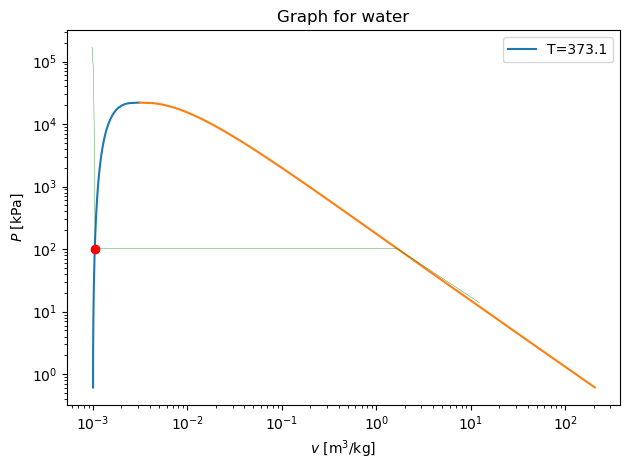

In [10]:
st1.plot("pv")

In [11]:
st1 = th.state('water', x=0, T=(100,'C'), name="1")
st2 = th.state('water', x=1, T=(100,'C'), name="2")

In [12]:
st2.h-st1.h

2256.3773156938682

In [13]:
pr = th.process([(st1,st2)])

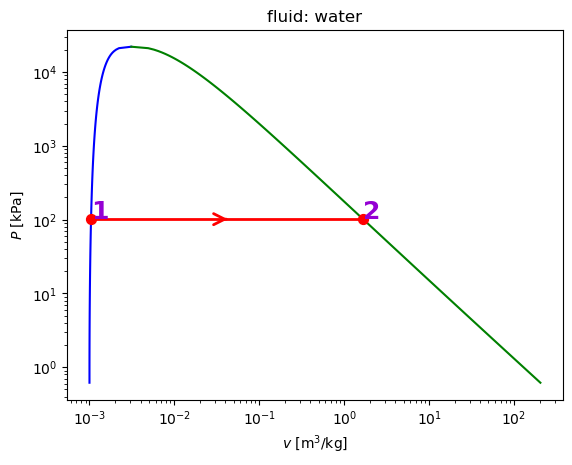

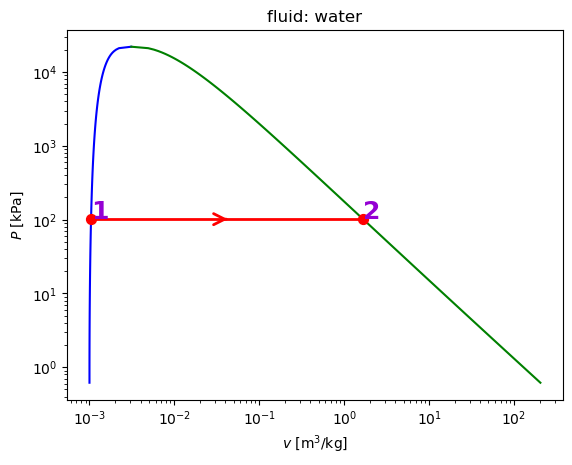

In [14]:
pr.plot('pv')

In [15]:
st1a = th.state('water', x=0, T=(120,'C'), name="1")
st2a = th.state('water', x=1, T=(120,'C'), name="2")

In [16]:
st2a.h-st1a.h

2202.0861173834032

In [17]:
pra = th.process([(st1a,st2a)])

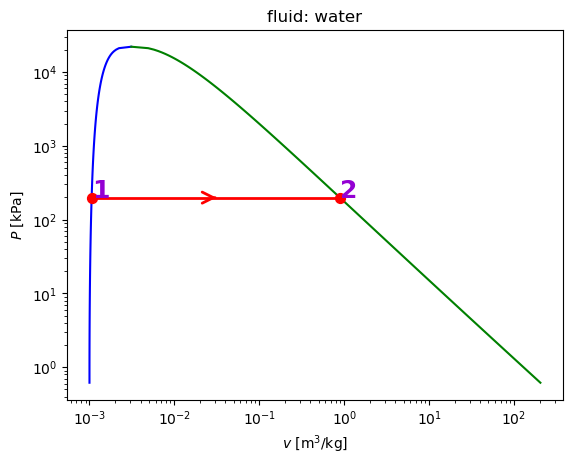

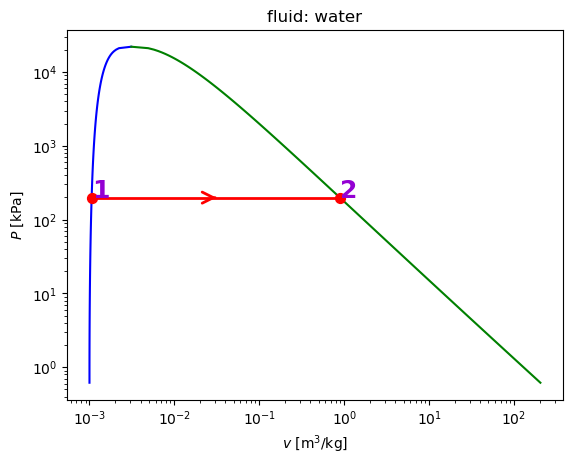

In [18]:
pra.plot('pv')